In [29]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from csv import DictReader

In [58]:
hashtag_stance_df = pd.read_csv("final_stance_hashtag.csv")
hashtag_stance = hashtag_stance_df["stance"]
stance_df = pd.read_csv("final_stance_word.csv")
stance = stance_df["stance"]

In [59]:
info_df = pd.read_csv('indiv_strength_diversity.csv')
info_df["stance"] = stance
info_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.119568,0.880432,1,1.0,0.0,-0.778
1,ABGYNservices,0,0.768067,0.231933,-1,0.0,1.0,0.306
2,Abigailschumach,0,0.634507,0.365493,1,1.0,0.0,0.219
3,Alboteaparty,0,0.654104,0.345896,1,1.0,0.0,0.208
4,alexdelong_,0,0.624424,0.375576,1,1.0,0.0,0.216


In [60]:
info_hashtag_df = pd.read_csv('hashtag_indiv_strength_diversity.csv')
info_hashtag_df['stance'] = hashtag_stance
info_hashtag_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.100336,0.899664,1,1.0,0.0,-0.797
1,ABGYNservices,0,0.646405,0.353595,-1,0.0,1.0,0.184
2,Abigailschumach,1,0.289298,0.710702,1,1.0,0.0,-0.126
3,Alboteaparty,0,0.554945,0.445055,1,1.0,0.0,0.109
4,alexdelong_,1,0.139209,0.860791,1,1.0,0.0,-0.269


$follower\_of$ column is marked as -1 if the account is a follower of prochoice account, 1 if the account is a follower of prolife account, 0 if both. The stance is in the range [-1, 1], 1 = prochoice, -1 = prolife.

In [61]:
diff = [info_hashtag_df['stance'][i]>0 and info_df['stance'][i]<0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff)

5

In [62]:
diff_2 = [info_hashtag_df['stance'][i]<0 and info_df['stance'][i]>0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff_2)

24

---
#  "prochoice_strength", "prolife_strength" and the "follower of" 

We will examinate the relationship from the dataframe with result calculated by using different set of words in tweets (hashtag or bag of word).

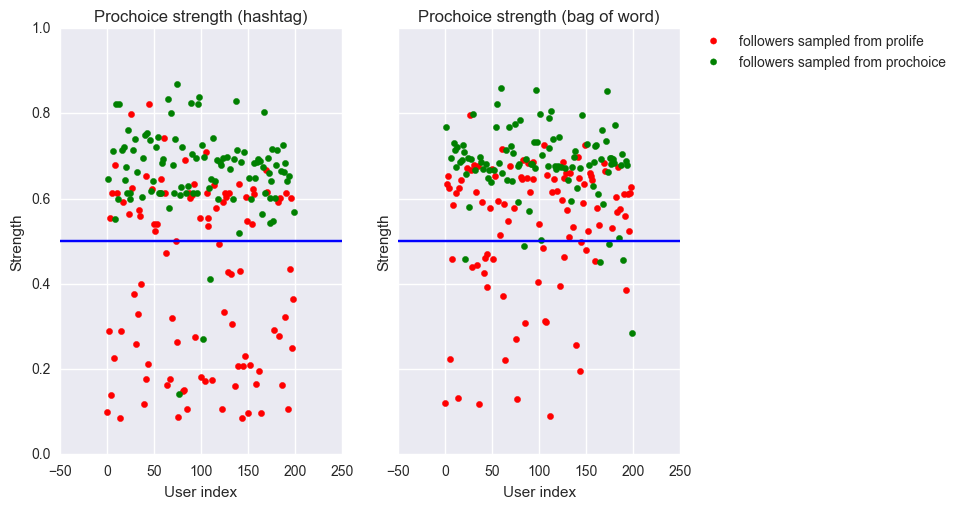

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prochoice strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prochoice strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

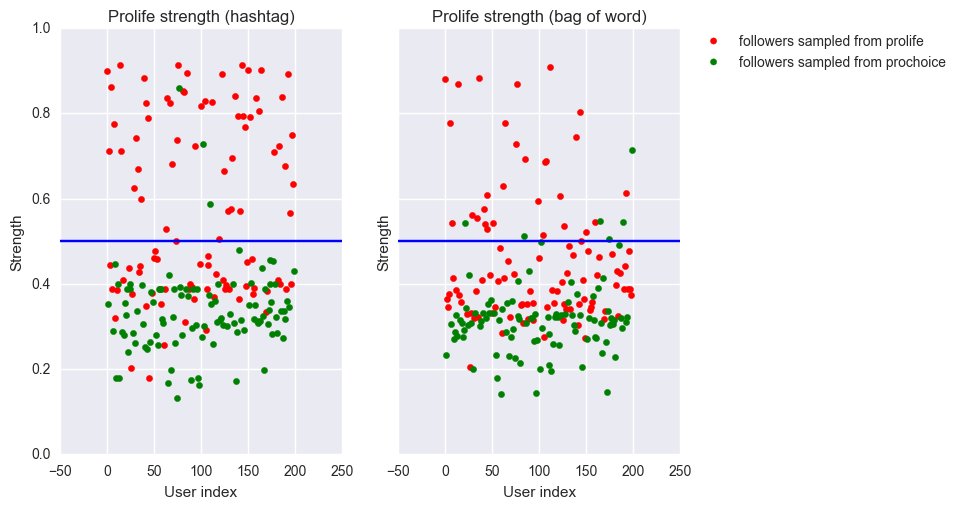

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prolife strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prolife strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

---
# "stance" vs the "follower of" 

Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice


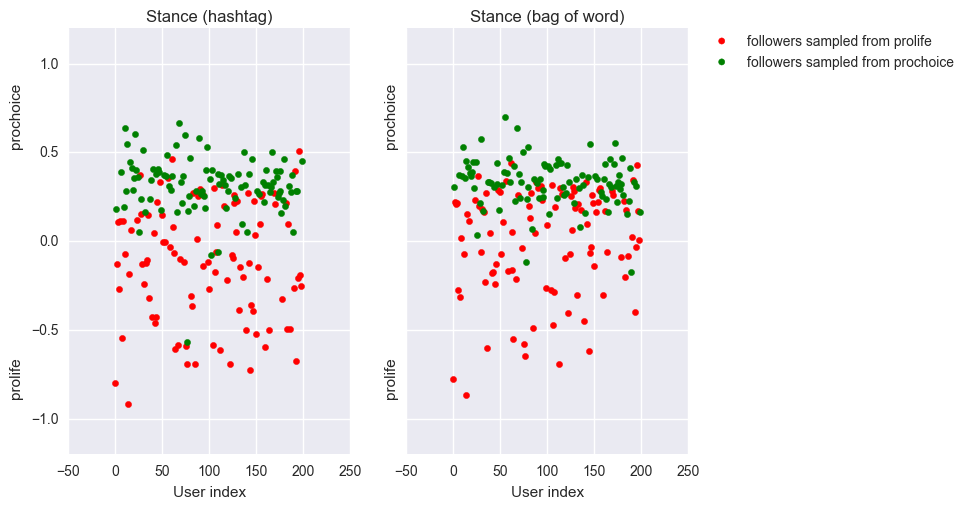

In [65]:
print("Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax1.set_title("Stance (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylim([-1.2, 1.2])
ax1.set_ylabel("prolife                                                 prochoice")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_ylim([-1.2, 1.2])
ax2.set_title("Stance (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("prolife                                                 prochoice")
plt.show()

---
#### Plot the relationship between the stance and the following proportions

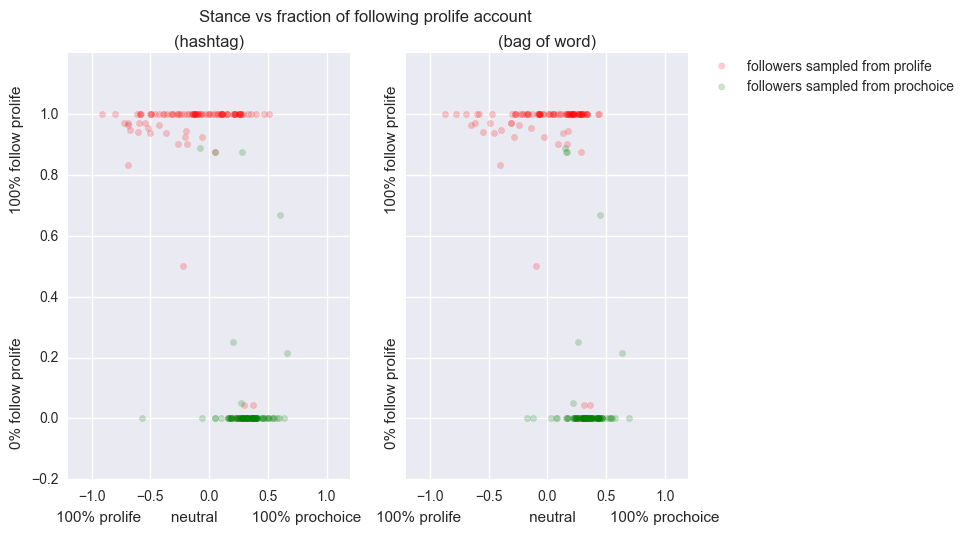

In [66]:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prolife                             100% follow prolife")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prolife                             100% follow prolife")
plt.suptitle("Stance vs fraction of following prolife account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

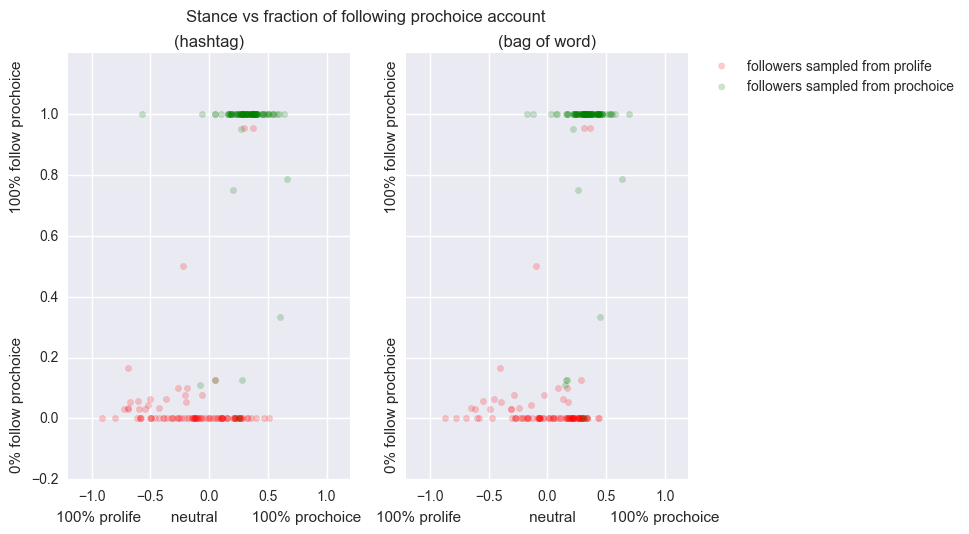

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prochoice                             100% follow prochoice")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prochoice                             100% follow prochoice")
plt.suptitle("Stance vs fraction of following prochoice account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

--------
# Examine unusal individuals with hashtag countings

Individuals who have an extreme stance, e.g. above 0.5 or below -0.5 score, are considered to have more similarities with known prolife/prochoice group. That indicates they tweet in a manner that is similar to prolife/prochoice accounts do. This similarity is in perspective of context and the usage of hashtag. However, if some individuals have a high similarity with a specific group but are following a lot of the opposite group, that is considered to be "unusal" and those are the people we are interested in looking at.

In [68]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv_hashtag = info_hashtag_df.loc[info_hashtag_df["stance"]>0]\
                          .loc[info_hashtag_df["prochoice proportion"]<info_hashtag_df["prolife proportion"]]  

In [69]:
prochoice_unusual_indiv_hashtag

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
3,Alboteaparty,0,0.554945,0.445055,1,1.000000,0.000000,0.1090
5,AllanLohr,0,0.613202,0.386798,1,1.000000,0.000000,0.1130
8,AngelaFairbanks,0,0.679725,0.320275,1,1.000000,0.000000,0.1110
17,basvandervoort,0,0.591952,0.408048,1,1.000000,0.000000,0.0656
21,bo_rajer,0,0.613202,0.386798,-1,0.666667,0.333333,0.6020
23,BrianChiasson,0,0.562981,0.437019,1,1.000000,0.000000,0.1220
27,CaRi1765,0,0.623732,0.376268,1,1.000000,0.000000,0.1540
35,clayguy83,0,0.558515,0.441485,1,1.000000,0.000000,0.1500
41,CSLCHSnMore,0,0.652461,0.347539,1,1.000000,0.000000,0.0478
45,defenderofthe8,0,0.821676,0.178324,1,1.000000,0.000000,0.2220


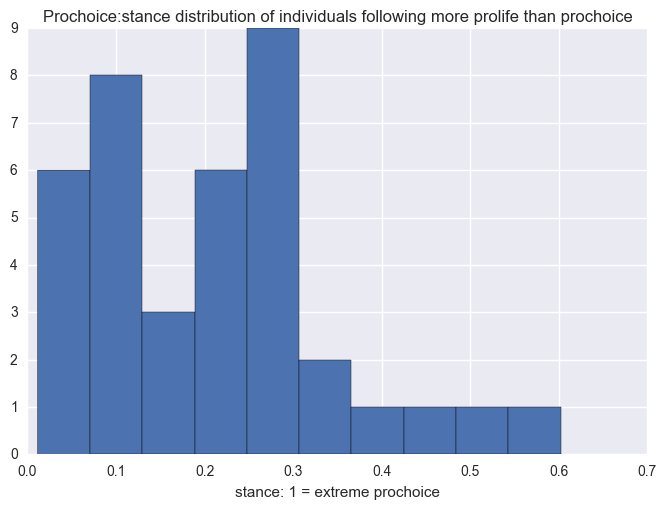

In [43]:
plt.hist(x=prochoice_unusual_indiv_hashtag["stance"])
plt.title("Prochoice:stance distribution of individuals following more prolife than prochoice")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

In [44]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
info_hashtag_df.loc[info_hashtag_df["stance"]<0]\
.loc[info_hashtag_df["prochoice proportion"]>info_hashtag_df["prolife proportion"]]

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
77,ibiloh,1,0.141654,0.858346,-1,0.0,1.0,-0.5700
110,KmTilley,1,0.411716,0.588284,-1,0.0,1.0,-0.0629


--------
# Examine unusal individuals with bag-of-word countings

In [70]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv = info_df.loc[info_df["stance"]>0]\
                                 .loc[info_df["prochoice proportion"]<info_df["prolife proportion"]]  
prochoice_unusual_indiv

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
2,Abigailschumach,0,0.634507,0.365493,1,1.000000,0.000000,0.21900
3,Alboteaparty,0,0.654104,0.345896,1,1.000000,0.000000,0.20800
4,alexdelong_,0,0.624424,0.375576,1,1.000000,0.000000,0.21600
8,AngelaFairbanks,0,0.586116,0.413884,1,1.000000,0.000000,0.01700
15,bakerbarb54130,0,0.625130,0.374870,1,1.000000,0.000000,0.15100
17,basvandervoort,0,0.642738,0.357262,1,1.000000,0.000000,0.11600
21,bo_rajer,1,0.457470,0.542530,-1,0.666667,0.333333,0.44600
23,BrianChiasson,0,0.670881,0.329119,1,1.000000,0.000000,0.23000
27,CaRi1765,0,0.668204,0.331796,1,1.000000,0.000000,0.19800
31,CDGonzo2016,0,0.679279,0.320721,1,1.000000,0.000000,0.17900


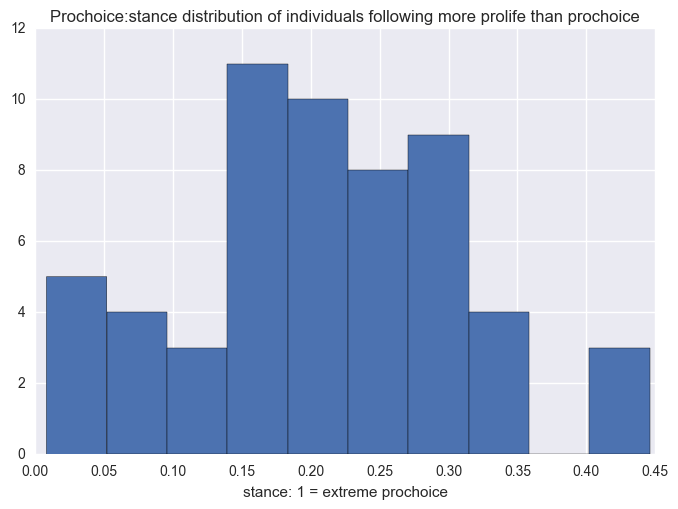

In [71]:
plt.hist(x=prochoice_unusual_indiv["stance"])
plt.title("Prochoice:stance distribution of individuals following more prolife than prochoice")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

In [72]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
info_df.loc[info_df["stance"]<0]\
.loc[info_df["prochoice proportion"]>info_df["prolife proportion"]]

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
77,ibiloh,0,0.592795,0.407205,-1,0.0,1.0,-0.119
189,trianglescheme,1,0.455589,0.544411,-1,0.0,1.0,-0.174


---
# Examine the hashtag/word vector for unusual individuals

In [73]:
data_path = 'hashtag_vec.mat'

data = sio.loadmat(data_path)
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['individual_data'] 
indiv_account_order = data['individual_account_order'] 

hashtag_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'hashtag_vector': list(indiv_account_data)
})
hashtag_df.head()

,hashtag_vector,user
0,"[70.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0...",ABabysRights
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ABGYNservices
2,"[12.0, 0.0, 1.0, 5.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",Abigailschumach
3,"[2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",Alboteaparty
4,"[3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",alexdelong_


In [74]:
data_path = 'bag_of_word_vec.mat'

data = sio.loadmat(data_path)
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['individual_data'] 
indiv_account_order = data['individual_account_order'] 

word_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'word_vector': list(indiv_account_data)
})
word_df.head()

,user,word_vector
0,ABabysRights,"[70.0, 30.0, 10.0, 1.0, 3.0, 3.0, 5.0, 5.0, 7...."
1,ABGYNservices,"[0.0, 2.0, 1.0, 0.0, 5.0, 4.0, 22.0, 0.0, 0.0,..."
2,Abigailschumach,"[12.0, 33.0, 1009.0, 9.0, 6.0, 10.0, 19.0, 8.0..."
3,Alboteaparty,"[2.0, 28.0, 1078.0, 25.0, 9.0, 10.0, 17.0, 9.0..."
4,alexdelong_,"[3.0, 11.0, 91.0, 9.0, 5.0, 5.0, 10.0, 5.0, 0...."


In [75]:
with open("select_word.csv") as f:
    words = [row["word"].strip() for row in DictReader(f)]

with open("select_hashtag.csv") as f:
    hashtags = [row["word"].strip() for row in DictReader(f)]

def get_hashtag_vec(user_name):
    result = []
    for n in hashtag_df.loc[hashtag_df['user']==user_name, 'hashtag_vector']:
        result.append(n)
    return result[0]

def get_word_vec(user_name):
    result = []
    for n in word_df.loc[word_df['user']==user_name, 'word_vector']:
        result.append(n)
    return result[0]

In [81]:
try:
    index = np.where(get_hashtag_vec('Abigailschumach') != 0)[0]
    for i in index:
        print(hashtags[i])
except IndexError:
    print("No hashtag in the tweets")

prolife
pregnancy
defundpp
catholic
scotus
praytoendabortion
protestpp
tcot
life
jesus
adoption
gopdebate
christian
usa
ccot
nevertrump
trump
obamacare
election2016
love
abortion
standwithpp
demsinphilly
blacklivesmatter
humanrights
plannedparenthood
tbt
nyc
texas
hr7


In [82]:
try:
    index = np.where(get_word_vec('Abigailschumach')!=0)[0]
    for i in index:
        print(words[i])
except IndexError:
    print("No word in the tweets")

prolife
life
rt
pro
parenthood
planned
women
baby
babies
us
ppact
human
abortions
saved
daily
children
unborn
people
child
pregnancy
right
support
praying
stories
god
every
bill
catholic
video
like
prayer
love
woman
health
rights
court
know
need
make
help
lives
plannedparenthood
care
end
defundpp
great
live
born
scotus
mother
vote
first
family
never
join
days
president
good
death
choice
world
us
choice
health
care
get
abortions
abortionfunds
anti
safe
reproductive
repealthe8th
love
work
pro
reprorights
read
legal
state
good
pregnancy
funds
justice
stigma
nyaaf
please
fund
texas
black
wholewomans
years
think
stopthesham


In [56]:
info_df.loc[info_df['account_name'] == 'defenderofthe8']

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
45,defenderofthe8,1,0.470439,0.529561,1,1.0,0.0,-0.13


---
#### Distribution of the following proportion from individuals sampled from prolife group and prochoice group

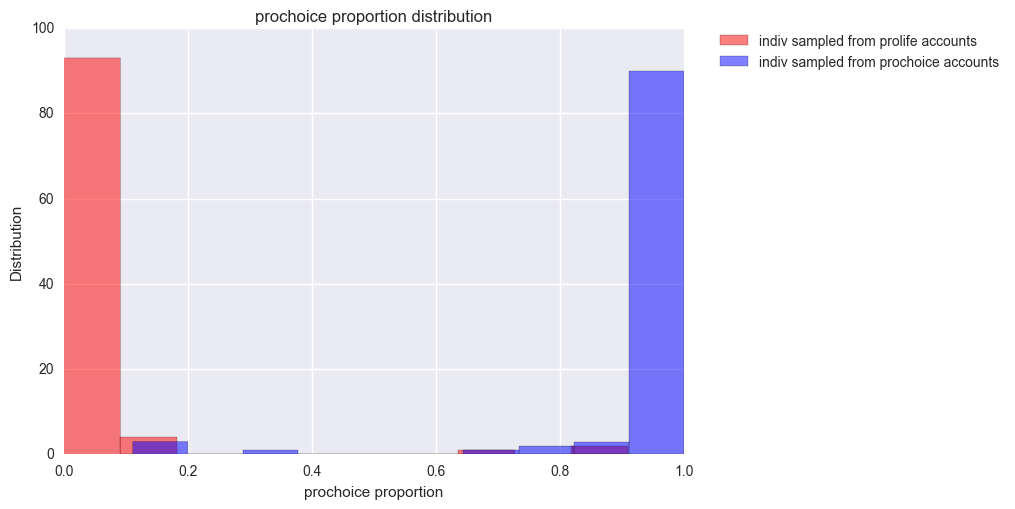

In [17]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prochoice proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prochoice proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prochoice proportion")
plt.title("prochoice proportion distribution")
plt.show()

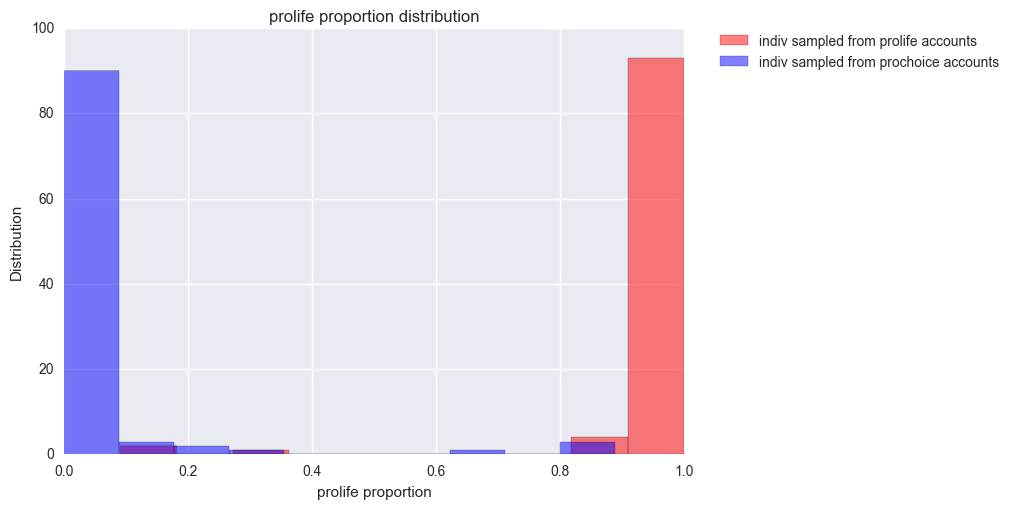

In [18]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prolife proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prolife proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prolife proportion")
plt.title("prolife proportion distribution")
plt.show()